# Assignment 3- Boston Housing Data

##### Name: Shannon Bytelaar
##### Date: Feb 1st 2023

### The purpose of this analysis is to create a prediction model for housing prices. 

We will identify important features and clean the data before model building

# Importing Dataset and packages:

In [1]:
import pandas as pd
import numpy as np

###### The dataset linked in the assignment had only 4 variables and less observations (rows).

* I imported the data from sklearn's datasets and then put it into the

In [2]:
from sklearn.datasets import load_boston
boston= load_boston()

df= pd.DataFrame(data=boston.data, columns= boston.feature_names)
df['MEDV'] = boston.target

C:\Users\cool_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


 ### Our 14 Variables :
* **CRIM**     per capita crime rate by town NUMERICAL
  
* **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft. NUMERICAL
 
* **INDUS**    proportion of non-retail business acres per town NUMERICAL
 
* **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) CATEGORICAL. 1= yes 0=no
 
*  **NOX**      nitric oxides concentration (parts per 10 million) NUMERICAL
 
* **RM**       average number of rooms per dwelling NUMERICAL
 
* **AGE**      proportion of owner-occupied units built prior to 1940 NUMERICAL

* **DIS**      weighted distances to five Boston employment centres  NUMERICAL
 
* **RAD**      index of accessibility to radial highways CATEGORICAL. It is a index of the highways an ordial ranking.

* **TAX**      full-value property-tax rate per 10,000  NUMERICAL

* **PTRATIO**  pupil-teacher ratio by town  NUMERICAL

* **B**        1000"(Bk - 0.63) ^2" where Bk is the proportion of blacks by town NUMERICAL

* **LSTAT**    percentage lower status of the population NUMERICAL

* **MEDV**     Median value of owner-occupied homes in $1000's NUMERICAL


MEDV will be what we are wanting to predict thus it is our dependent variable. That means we have 13 independent variables to start. We will go into EDA to identify feature selection below.

# Data Types

Our data is numerical data types except RAD is categorical. I will be dropping RAD from our analysis. 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df.info()

# no missing data and all are numerical floats.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Summary Statistics for each Variable:

### Checking summary stats by using the code below

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Comments:


* **CRIM**  : With a mean 0f 3.61 and Standard deviation on 8.601 the CRIM rate has a wide spread. It is interesting to note that the min and max have a large range. It shows me that for the majority of towns the crime rate is low and there are exceptions to high crime rates and extremely low crime rates.    
  
  
* **ZN**  : Zoned proportion of land zoned for lots over 25ksqft. The summary statistics again show that a lot of the data is relatively low or 0 since the min,25%-50% is 0. 
This shows that there is a large proportion of data not over 25ksqft thus not getting a zoned proportion of land #. Thus the variance (SD) is very high at 23.3 making the spread of data large.
 
* **INDUS**: Mean of 11.13 and SD of 6.86. The max being 27. This is the first variable so far that may be fairly normally distributed.
 
* **CHAS** : CHAS is binary categorical so the data for Mean, SD doesn't explain much since you can only be 1 or 0 and nothing inbetween.  
 
* **NOX** : I would assume higher nitric oxide concentration is closer to industrial areas. All of the summary stats are quite close to one another thus showing that the spread of data does not have a high variance and could be normally distributed.     
 
* **RM**: Avg num of rooms is 6.28 with a small STD of 0.70. The max being 8.78 and Min 3.56. From these numbers I'm assuming RM is very normally distributed. 
 
* **AGE**  : The avg age is 68 with a very high STD of 28.   
* **DIS**  : The avg distance 3.79 with a STD of 2.1. The max is 12.12 and the min is 1.1. 
 
* **RAD** : Rad is technically a categorical variable. So these numbers do not really mean anything.     

* **TAX** : The tax variable has a mean of 408 with a STD of 168. The data spread here is large as the min is 187 and the max 711    

* **PTRATIO**: The mean is 18.4 with a STD of 2.16. I like the variance here as it could be normally distributed.

* **B** : the mean is 356 with a high STD of 91.29. The min is VERY small at 0.32 meaning some towns have a very small proportion of black individuals. The % and max are all very high.       

* **LSTAT** :  The LSTAT has a mean of 12.65 with a STD of 7.14. The max is 37.97 and min 1.73.  The large gap from 75% to max could show that there are outliers in this. 

* **MEDV** : The Mean MEDV is 22.53 with a STD of 9.19. The Max is capped at 50. There could be outliers in this too.

## *** Overall describing these statistics can begin the journey to understanding what each variable is telling us. The mean and STD show us the variance which can indicate if the data may be useful or not. ***


# Univariate Analysis

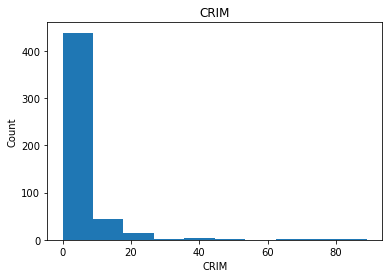

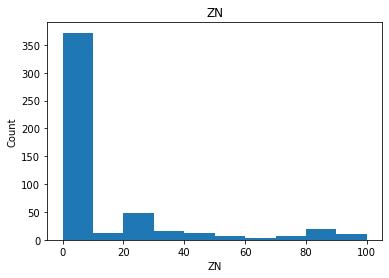

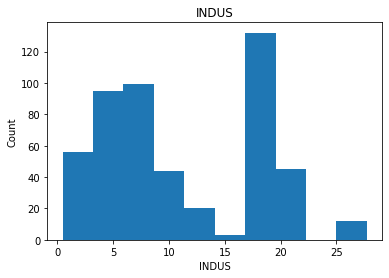

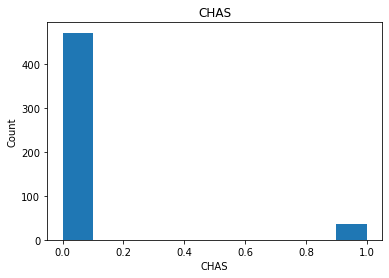

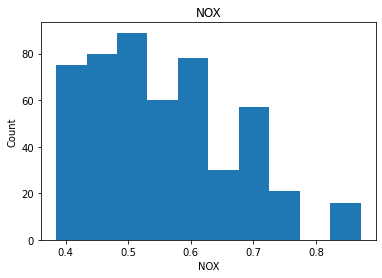

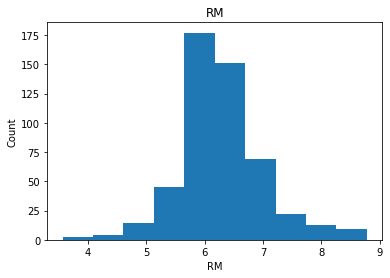

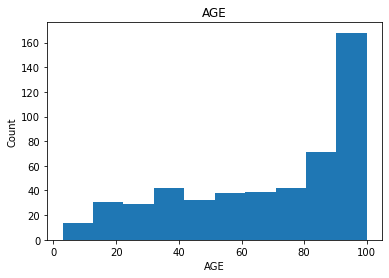

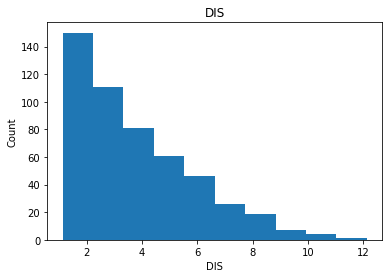

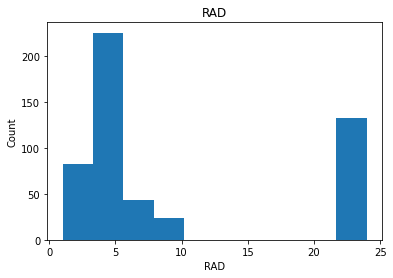

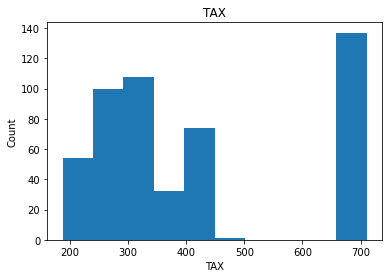

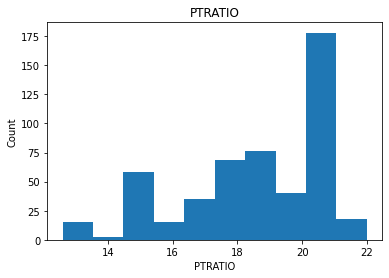

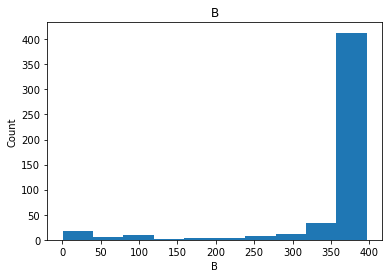

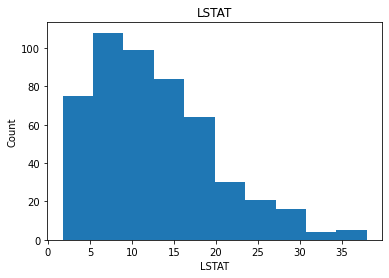

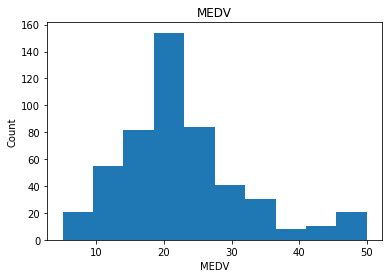

In [7]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

# Interpretation:

#### Fairly Normally distriubuted: 

**MEDV** is fairly normally distributed with a tad bit of a right skew thus indicating it may have some outliers in the values

**RM** is normally distributed and symetrical. No obvious outliers.

**PT RATIO** This isnt exactly normally distributed but it is close to being so.

#### Right Skewed data:

**LSTAT**

**DIS**

**CRIM**: Crim is mainly low as we stated before. It has a lot of small outliers as most of the data is between 0-20.

**NOX**

**ZN**

#### Left Skewed data:

**B**

**AGE**

#### Nonsymetric bimodal distribution:

**TAX**

**RAD**

**CHAS**- MOST are not by the river. Thus 1 (by the river) is an outlier


### The skewness of our data identifies outliers in the variables which is important to know when analyzing further. These outliers will be adressed in our model later.

# Bivariate Analysis using Correlation and Scatterplot

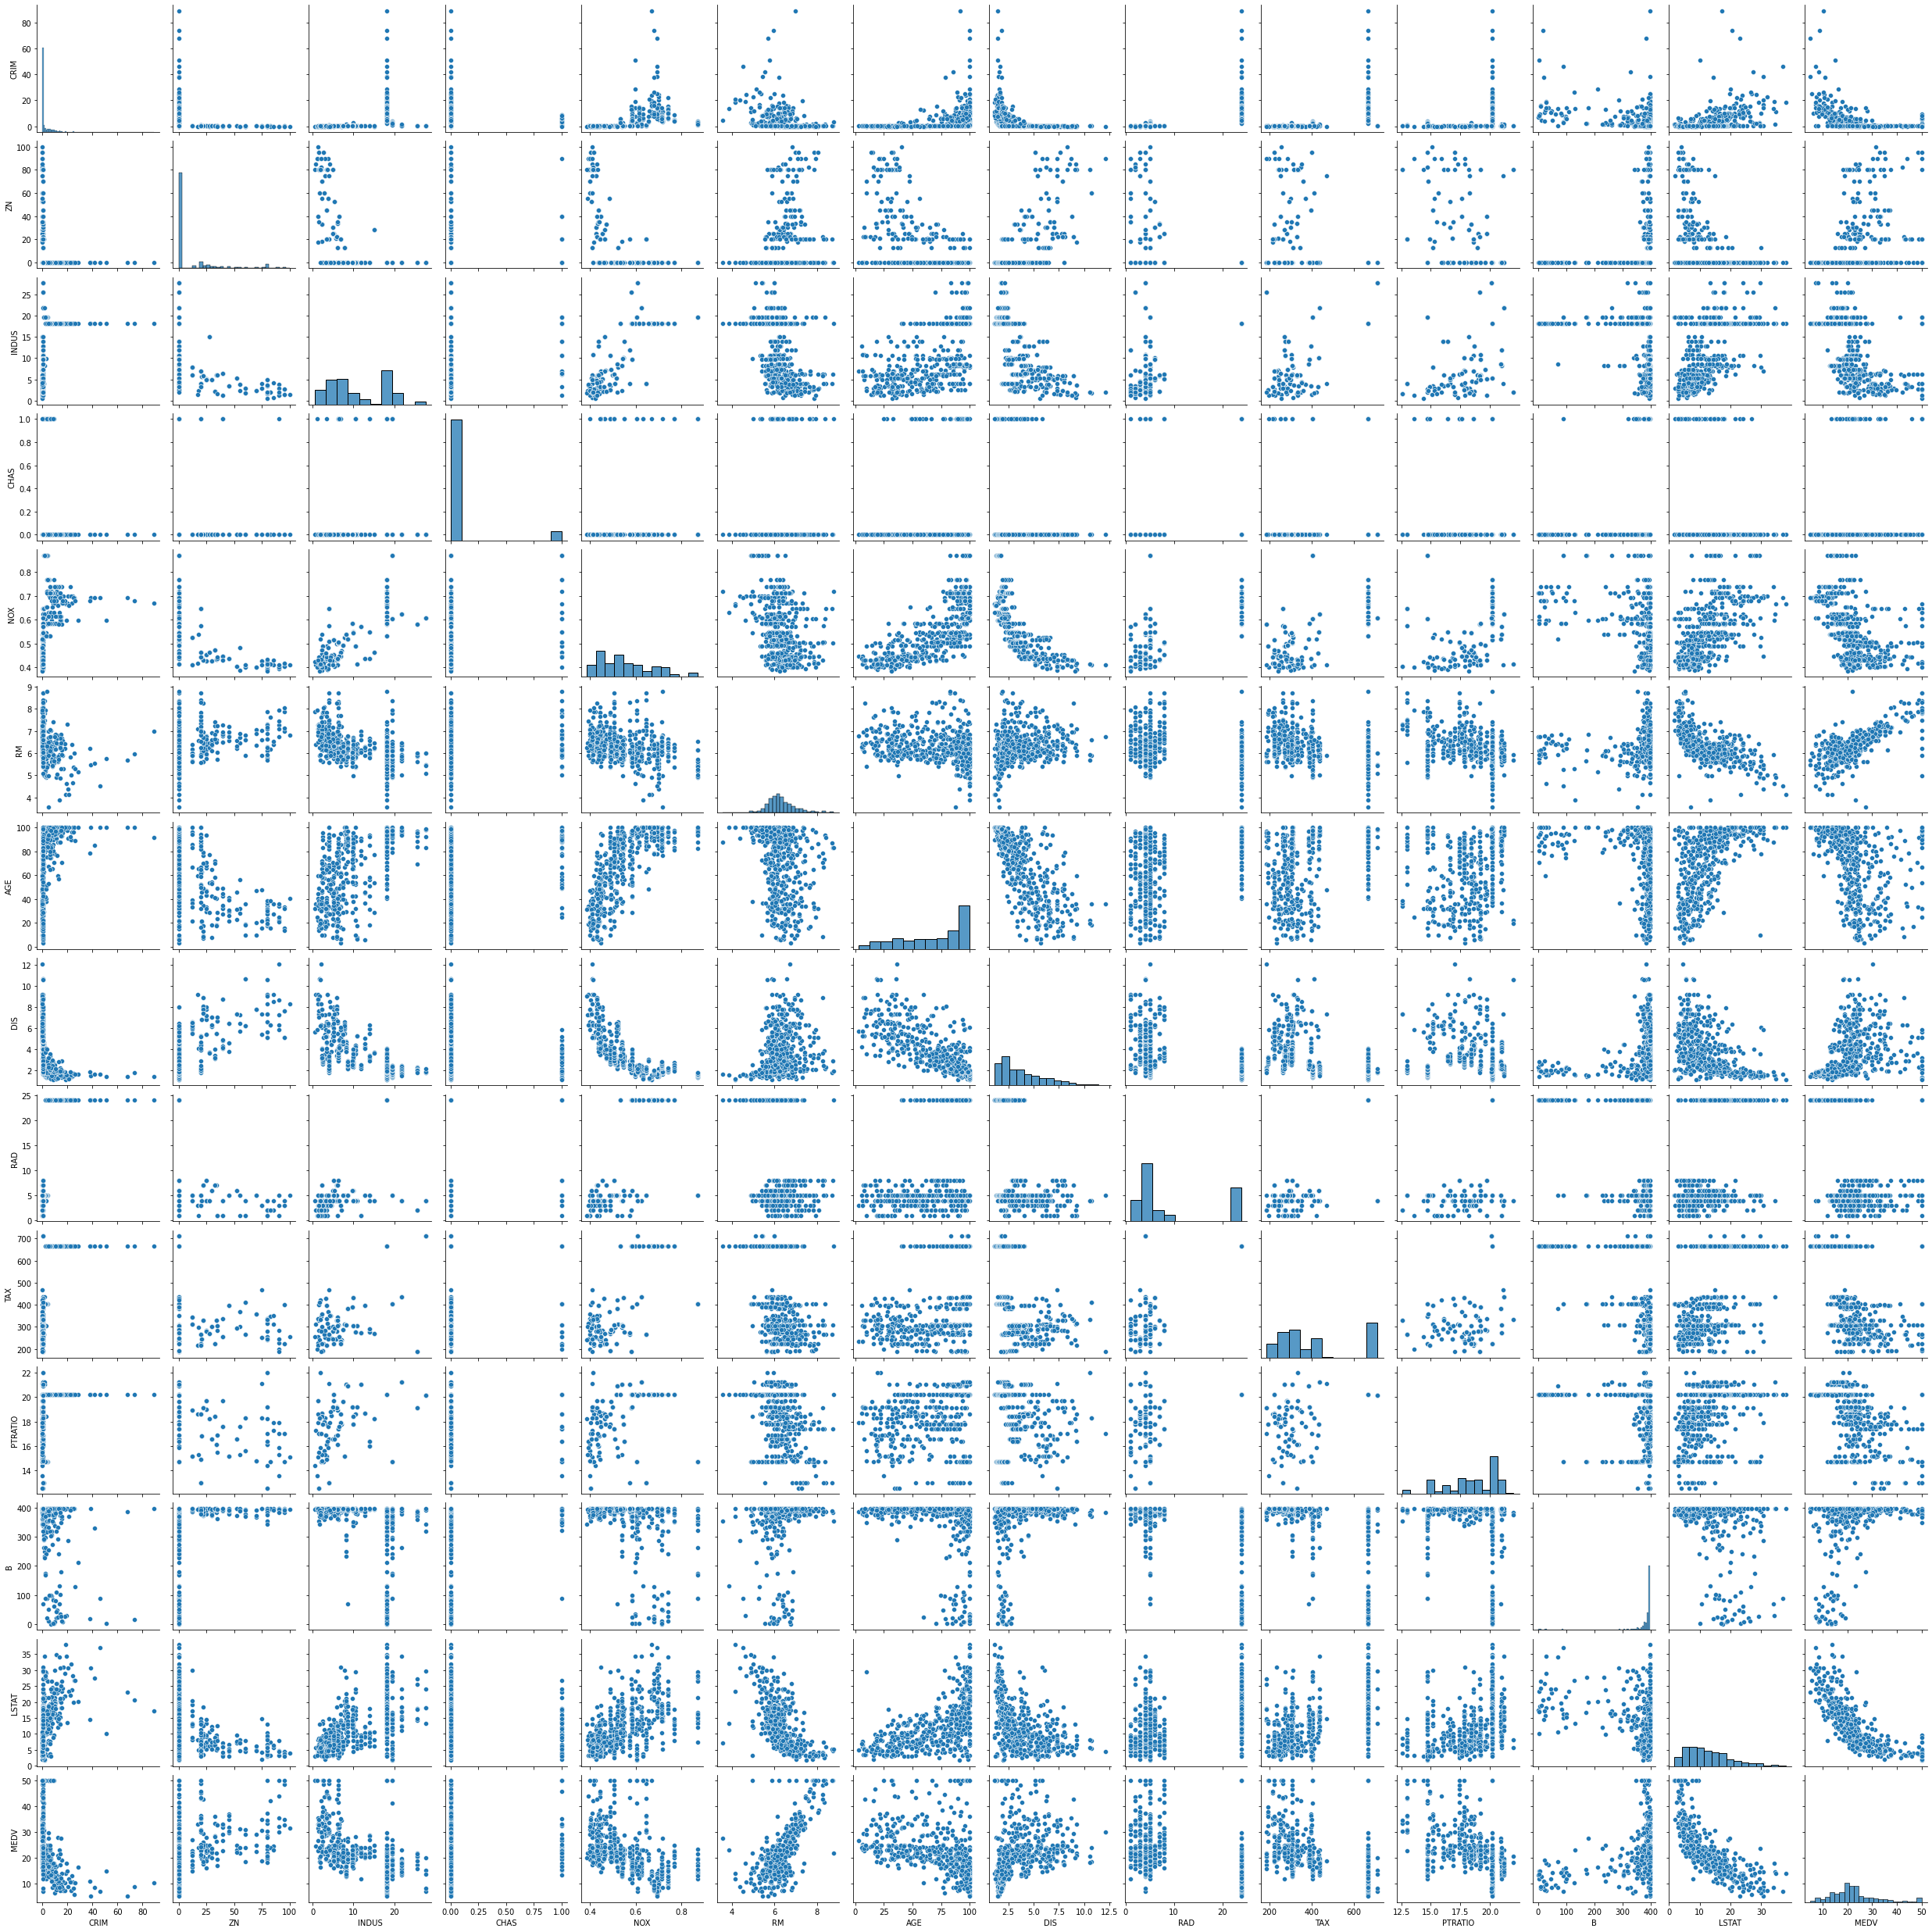

In [8]:
DataVis= sns.pairplot(df)
print(DataVis)

#Way too much to focus on anything. We can narrow it down.

<AxesSubplot:>

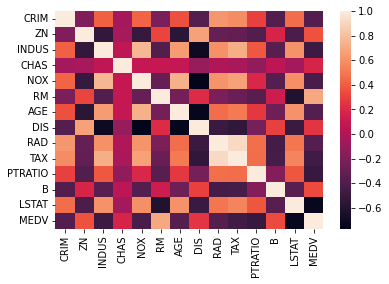

In [9]:
sns.heatmap(df.corr())

# Does CRIM have associations?

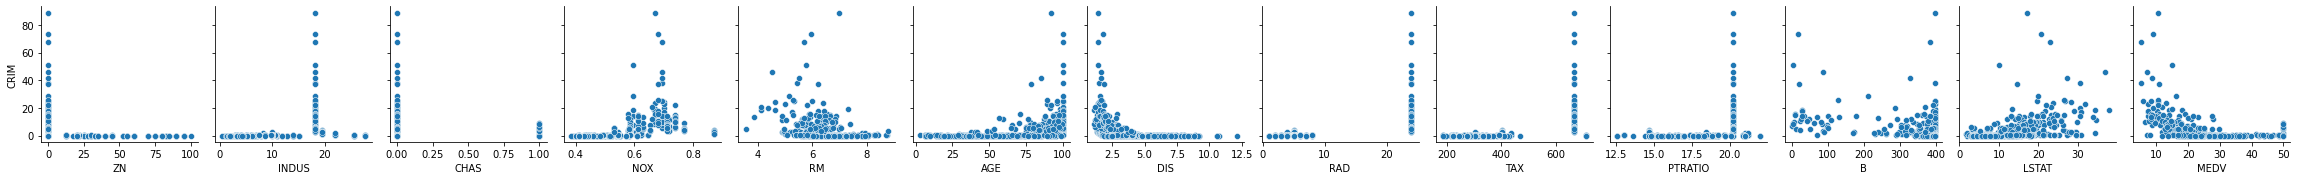

In [10]:
CrimG= sns.pairplot(df, x_vars=['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'], y_vars='CRIM')
# To make more legible I will take out variables with low correlation

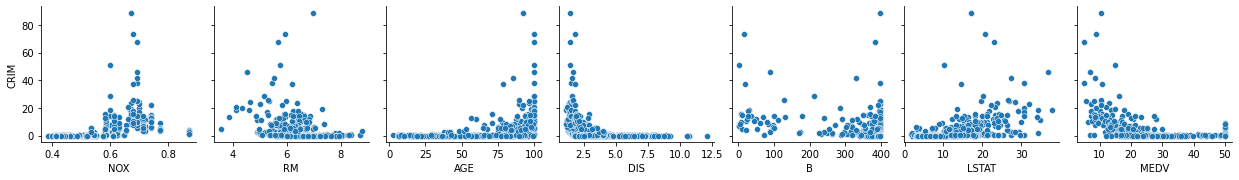

In [11]:
CrimG= sns.pairplot(df, x_vars=['NOX','RM','AGE','DIS','B','LSTAT','MEDV'], y_vars='CRIM')
# To make more legible I will take out variables with low correlation

In [12]:
df.corr()['CRIM'].sort_values(ascending=True)

MEDV      -0.388305
B         -0.385064
DIS       -0.379670
RM        -0.219247
ZN        -0.200469
CHAS      -0.055892
PTRATIO    0.289946
AGE        0.352734
INDUS      0.406583
NOX        0.420972
LSTAT      0.455621
TAX        0.582764
RAD        0.625505
CRIM       1.000000
Name: CRIM, dtype: float64

# Comments

Looking at the scatter plot and correlation for crime. Nothing is extremely correlated here. RAD is disregarded since it is a categorcal variable.

Overall there is low correlation with all the variables related to CRIM. Nothing stands out.

# Scatterplot and Correlation with MEDV

Since MEDV is our dependent variable in further analysis I want to focus on analyzing this variable with the independent variables.

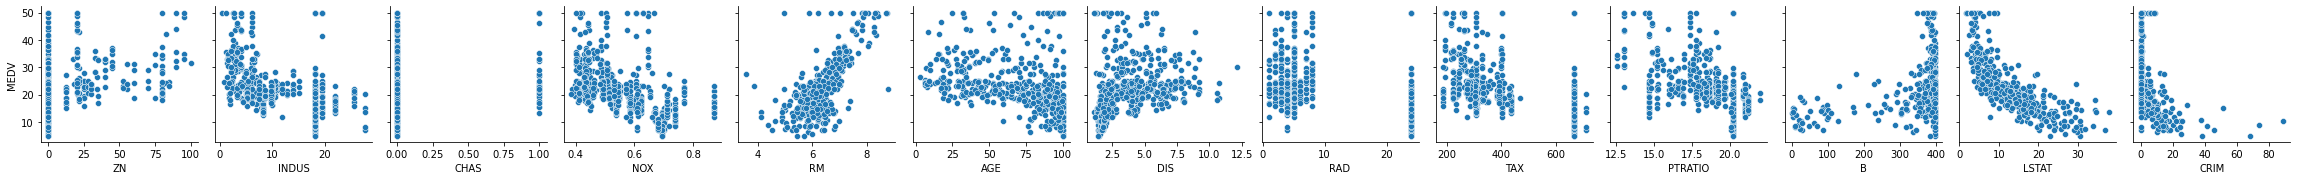

In [13]:
MEDVG= sns.pairplot(df, x_vars=['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CRIM'], y_vars='MEDV')
#  I will take out variables with low correlation or seeminly none to get a closer look

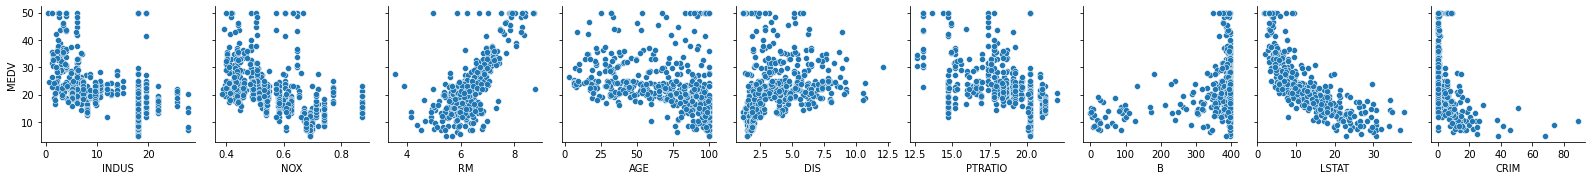

In [14]:
MEDVG= sns.pairplot(df, x_vars=['INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT','CRIM'], y_vars='MEDV')

In [15]:
df.corr()['MEDV'].sort_values(ascending=True)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

# Comments

Here we can see there is the highest correlation with LSTAT (-), then RM (+), then PTRatio(-), INDUS(-) etc. 

This shows when LSTAT goes up, Prices comedown
When RM increase prices increase
When PTRatio is increaing the price decreases.

These are just a few insights before fully testing our models.



# Base Model 

This is to get an understanding of what our Rsquared is before we begin feature selecting

* I will not be including our categorical variable RAD as one hot encoding will add 9 more columns 

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

In [17]:
X= df.drop(['MEDV','RAD'],axis=1)
y= df.MEDV

In [18]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# This trains our dataset at 80% and test is 20%

In [19]:
x=sm.add_constant(X_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())

# R SCORE OF 0.755

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     87.59
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          8.28e-103
Time:                        10:09:04   Log-Likelihood:                -1215.5
No. Observations:                 404   AIC:                             2457.
Df Residuals:                     391   BIC:                             2509.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0409      5.802      5.867      0.0

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.7288551021441338


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lin.predict(X_test)
from sklearn.metrics import r2_score
print("Linear Regression R squared of the test set is: {:.2f}".format(r2_score(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.72


In [23]:
from sklearn.metrics import mean_squared_error
print("Linear Regression MSE of the test set is: {:.2f}".format(mean_squared_error(y_test, y_pred)))
lin_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Linear Regression RMSE of the test set is: {:.2f}".format(lin_rmse))
from sklearn.metrics import mean_absolute_error
print("Linear Regression MAE of the test set is: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Linear Regression MSE of the test set is: 18.74
Linear Regression RMSE of the test set is: 4.33
Linear Regression MAE of the test set is: 3.34


In [24]:
d = {'true': y_test, 'predicted': y_pred}
dff= pd.DataFrame(data=d)

In [25]:
dff['diff'] = dff['predicted']-dff['true']
dff.head(5)

,true,predicted,diff
154,17.0,24.092523,7.092523
186,50.0,35.385195,-14.614805
180,39.8,33.989730,-5.810270
249,26.2,23.901006,-2.298994
35,18.9,23.684317,4.784317


## For the first test the results are not bad but they are extremely overfitted since there are too many specific variables. It would only work for this particular dataset. We will need to go into feature selection to understand what it the overall best model possible.

# Feature Selection with Correlation:

In [26]:
df.drop(['RAD'],axis=1) #Dropping Rad since its categorical

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


In [27]:
Corr1=abs(df.corr()['MEDV']).sort_values(ascending=False)
Corr1

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [28]:
# Here we can see the absolute values and get the top 3 correlation
Corr1.head(4)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
Name: MEDV, dtype: float64

### Now we know the top correlated features are LSTAT, RM, and PTRATIO.

# Model 2- Based off of our correlation feature selection

In [29]:
X= df[['LSTAT','RM','PTRATIO']]
y= df.MEDV

In [30]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# This trains our dataset at 80% and test is 20%

In [31]:
x=sm.add_constant(X_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     275.7
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.79e-97
Time:                        10:09:04   Log-Likelihood:                -1245.6
No. Observations:                 404   AIC:                             2499.
Df Residuals:                     400   BIC:                             2515.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4211      4.433      3.704      0.0

### This tests pvalues are significant and but our R squared is not as high as I would want it. There could be some multicolinerity.

# Testing VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
  
# Ivs
X = df[['INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT','CRIM']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

   feature        VIF
0    INDUS  11.503754
1      NOX  69.288504
2       RM  72.198841
3      AGE  20.893468
4      DIS  11.334603
5  PTRATIO  66.737109
6        B  18.553653
7    LSTAT  10.970463
8     CRIM   1.684728


# This shows me that CRIM may be important in our model building as it has a very low VIF. I will run a model with CRIM and then check for interaction variables.

In [33]:
X= df[['LSTAT','RM','PTRATIO','CRIM']]
y= df.MEDV

In [34]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# This trains our dataset at 80% and test is 20%

In [35]:
x=sm.add_constant(X_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())

#Adding Crim made the Rsquare go up a tiny bit. Time to test for multicolinerity.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.43e-96
Time:                        10:09:04   Log-Likelihood:                -1258.7
No. Observations:                 404   AIC:                             2527.
Df Residuals:                     399   BIC:                             2547.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2379      4.723      3.227      0.0

In [36]:
df[['LSTAT','RM','PTRATIO','CRIM']].corr()

,LSTAT,RM,PTRATIO,CRIM
LSTAT,1.000000,-0.613808,0.374044,0.455621
RM,-0.613808,1.000000,-0.355501,-0.219247
PTRATIO,0.374044,-0.355501,1.000000,0.289946
CRIM,0.455621,-0.219247,0.289946,1.000000


### This shows us that RM and LSTAT have a strong correlation together. I will make a interaction variable of them combined to try and account for the noise it is creating.

# MODEL 3- With Interaction term

In [37]:
#Adding the variable
df['RMxLSTAT']= df['RM']*df['LSTAT']

In [38]:
X= df[['LSTAT','RM','PTRATIO','CRIM','RMxLSTAT']]
y= df.MEDV

In [39]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# This trains our dataset at 80% and test is 20%

In [40]:
x=sm.add_constant(X_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     242.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          2.91e-118
Time:                        10:09:04   Log-Likelihood:                -1182.7
No. Observations:                 404   AIC:                             2377.
Df Residuals:                     398   BIC:                             2401.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.1503      4.739     -2.986      0.0

### Adding the interation term enhanced our model significantly as all pvalues are below 0.05 and our Rsquare has improved.

# Model 4- Taking out the outliers to imporve our model

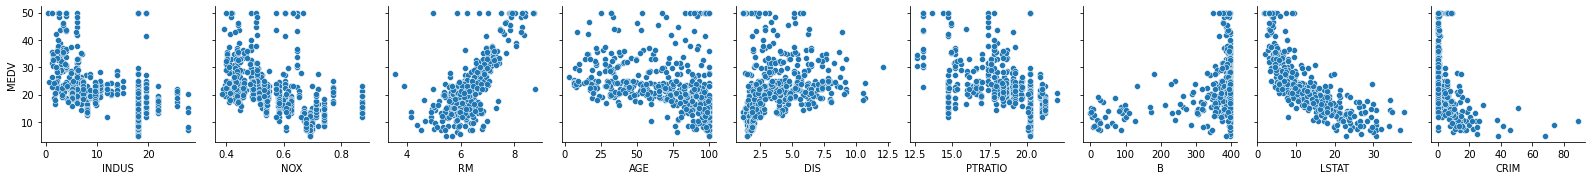

In [41]:
MEDVG= sns.pairplot(df, x_vars=['INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT','CRIM'], y_vars='MEDV')

Going back to the scatterplot we made for MEDV we can see that at the top MEDV scatterplots there is a line of outliers that do not follow the linearity. This I believe is because the MEDV price was capped at 50k. I will use the code below to take out all outliers at the max MEDV price to see if it improves our model.

In [42]:
df = df.drop(df[df['MEDV']==df['MEDV'].max()].index.tolist())
# This line of code deletes all MEDV that are at .max()

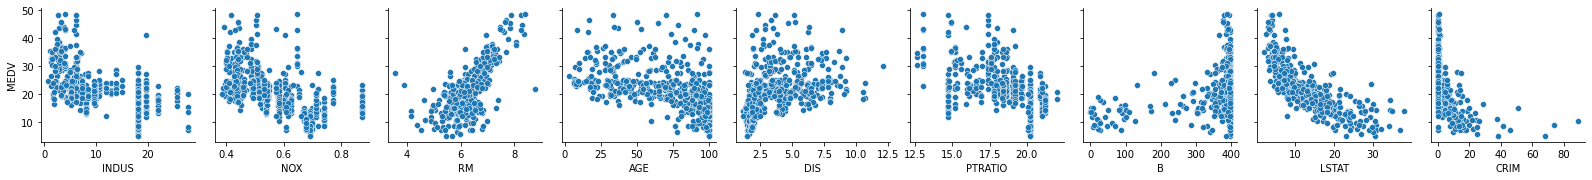

In [43]:
MEDVG= sns.pairplot(df, x_vars=['INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT','CRIM'], y_vars='MEDV')

# This shows the new visual and it looks a lot better without the floating max outliers.

Now lets run the same model as M3 but with the newly cleaned data:

In [44]:
X= df[['LSTAT','RM','PTRATIO','CRIM','RMxLSTAT']]
y= df.MEDV

In [45]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# This trains our dataset at 80% and test is 20%

In [46]:
x=sm.add_constant(X_train)
est=sm.OLS(y_train,x).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     322.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          2.08e-135
Time:                        10:09:06   Log-Likelihood:                -1032.9
No. Observations:                 392   AIC:                             2078.
Df Residuals:                     386   BIC:                             2102.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1166      3.928     -4.103      0.0

### This really improved our model as our Rsquare score is 0.818 and our pvalues are significant!. Let's test it's performance with RSME, MAPE and MAE.

## The multiple linear equation for this model would be: 
##### Median House Price=       -15.55+1.97(LSTATX)+8.97(RMX)-0.64(PTRATIOX)-0.12(CRIMX)-0.41(RMxLSTATx)

This essentially means that for each variables coeffiecient you will multiply it by the value of each variable. Thus if the coefficient is negative the independent variable will get a decrease in price and if it is a positive coefficient it will get an increase in price.

# Testing our models validity

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.8069172844544208


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = lin.predict(X_test)
from sklearn.metrics import r2_score
print("Linear Regression R squared of the test set is: {:.2f}".format(r2_score(y_test, y_pred)))

Linear Regression R squared of the test set is: 0.80


In [50]:
lin_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Linear Regression RMSE of the test set is: {:.2f}".format(lin_rmse))
from sklearn.metrics import mean_absolute_error
print("Linear Regression MAE of the test set is: {:.2f}".format(mean_absolute_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_percentage_error
print("Linear Regression MAPE of the test set is: {:.2f}".format(mean_absolute_percentage_error(y_test, y_pred)))

Linear Regression RMSE of the test set is: 3.78
Linear Regression MAE of the test set is: 2.70
Linear Regression MAPE of the test set is: 0.15


* ###  Since the RMSE, MAE and MAPE are all quite small I believe the model is fitted quite well for prediction. The rsquared score is high enough to prevent underfitting and low enough to not be considered overfitted thus the model could be used for future data in this location.

* ### This model is well fitted for predictions now


In [51]:
d = {'true': y_test, 'predicted': y_pred}
dff= pd.DataFrame(data=d)

In [52]:
dff['diff'] = dff['predicted']-dff['true']
dff.head(5)

,true,predicted,diff
337,18.5,19.786307,1.286307
209,20.0,15.348338,-4.651662
216,23.3,20.644143,-2.655857
190,37.0,32.337017,-4.662983
90,22.6,24.722992,2.122992


# Cross-Validation Technique

In [53]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target (y)
X = df[['LSTAT','RM','PTRATIO','CRIM','RMxLSTAT']]
y = df[['MEDV']]

# Initialize the model
model = LinearRegression()

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=10)

# List to store the mean squared errors for each fold
mse_values = []

# Loop over each fold
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X_train, X_test
    y_train, y_val = y_train, y_test
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation data
    y_pred = model.predict(X_val)
    
    # Compute the mean squared error,RMSE,MAE
    mse = mean_squared_error(y_val, y_pred)
    mse_values.append(mse)
    Rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    MAE = mean_absolute_error(y_test, y_pred)

# Compute the mean of the mean squared errors
mean_mse = np.mean(mse_values)

# Print the mean squared error
print("Mean Squared Error:", mean_mse)
print("RMSE:",Rmse)
print("MAE:",MAE)

Mean Squared Error: 14.297745660898153
RMSE: 3.78123599645647
MAE: 2.699773064779757


In [54]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [57]:
ridgeCV = Ridge()
cvs = cross_val_score(ridgeCV, df[['LSTAT','RM','PTRATIO','CRIM','RMxLSTAT']], df.MEDV, cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 

# note that the cv parameter above is set to n, i.e, 20.

Mean Score:
0.5283873417259375 

Confidence Interval:


(0.21919502677870012, 0.8375796566731748)

# This goes inline with what our model has predicted.